In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import scipy

In [2]:
input_folder = "input-data/"
arrivals_file = input_folder + "arrivals.csv"
arrivals = pd.read_csv(arrivals_file)

timespent_file = input_folder + "timespent.csv"
timespent = pd.read_csv(timespent_file)

speeds_file = input_folder + "speeds.csv"
speeds = pd.read_csv(speeds_file)

In [3]:
speeds_sample_size = speeds.shape[0]
print ("Sample size of speeds is {:d}".format(speeds_sample_size))

Sample size of speeds is 5000


In [4]:
n_bins = np.sqrt(speeds_sample_size)
print ("Number of bins should be {:.2f}".format(n_bins))

Number of bins should be 70.71


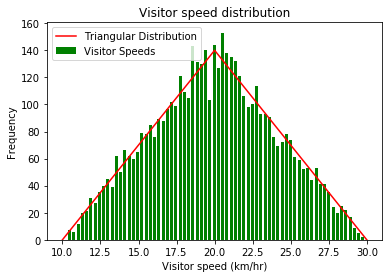

In [5]:
n_bins = 70
n, bins, patches = plt.hist(speeds.as_matrix(), n_bins, rwidth=0.7, label='Visitor Speeds', color='green')
x = range(10,31)
y = []
for i in range(10,21):
    y.append(14*i-14*10)
for i in range(21,31):
    y.append(14*30-14*i)
plt.plot(x,y,'red', label='Triangular Distribution')
plt.xlabel('Visitor speed (km/hr)')
plt.ylabel('Frequency')
plt.title('Visitor speed distribution')
plt.legend()
plt.show()

In [6]:
bins = [0.0] * (n_bins+1)
bins[int(n_bins/2)] = 20
for i in range(0,int(n_bins/2)):
    bins[i] = np.sqrt(2*i/n_bins)*10 + 10
    bins[n_bins - i] = (2 - np.sqrt(2*i/n_bins))*10 + 10

In [7]:
n1, bins1 = np.histogram(speeds.as_matrix(), bins=bins)

In [8]:
chisquare_on_speeds , p_value = scs.chisquare(n1)
print ("P-value of Chi-Square Goodness of Fit Test is {:.2f}".format(p_value))

P-value of Chi-Square Goodness of Fit Test is 0.61


In [9]:
triangular_left = 10
triangular_mode = 20
triangular_right = 30

In [10]:
timespent_sample_size = timespent.shape[0]
print ("Sample size of speeds is {:d}".format(timespent_sample_size))

Sample size of speeds is 2400


In [11]:
n_bins = np.sqrt(timespent_sample_size)
print ("Number of bins should be {:.2f}".format(n_bins))

Number of bins should be 48.99


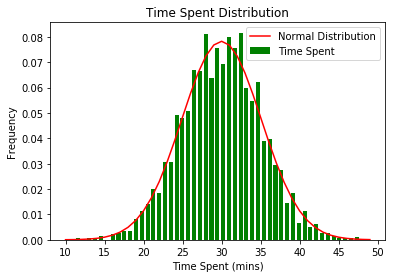

In [12]:
mean_timespent = timespent.iloc[:,1:].as_matrix().mean()
std_timespent = timespent.iloc[:,1:].as_matrix().std()

x = range(10,50)
y = []
for i in x:
    value = (1/(np.sqrt(2*np.pi*std_timespent*std_timespent)))*np.exp(-((i-mean_timespent)**2)/(2*std_timespent*std_timespent))
    y.append(value)

n_bins = 49
plt.hist(timespent.iloc[:,1:].as_matrix(), n_bins, rwidth=0.7, normed=True, label='Time Spent', color='green')
plt.plot(x,y,'red', label='Normal Distribution')
plt.xlabel('Time Spent (mins)')
plt.ylabel('Frequency')
plt.title('Time Spent Distribution')
plt.legend()
plt.show()

In [13]:
statistic, pvalue = scs.normaltest(timespent.iloc[:,1:].as_matrix())
print ("P-value of Chi-Square Goodness of Fit Test is {:.2f}".format(pvalue[0]))

P-value of Chi-Square Goodness of Fit Test is 0.85


In [14]:
mean_timespent

29.988125

In [15]:
std_timespent

5.0959956322955184

In [16]:
arrivals_sample_size = arrivals.shape[0]
print ("Sample size of arrivals is {:d}".format(arrivals_sample_size))

Sample size of arrivals is 800


In [17]:
n_bins = np.sqrt(arrivals_sample_size)
print ("Number of bins should be {:.2f}".format(n_bins))

Number of bins should be 28.28


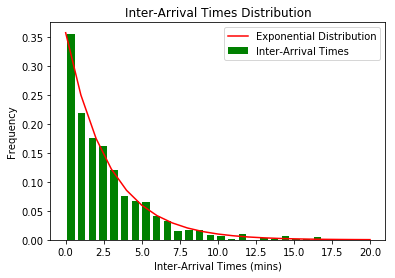

In [18]:
n_bins = 28
arrival_times = arrivals.iloc[:,1:].as_matrix()
num = len(arrival_times)

inter_arrival_times = np.array([0.0]*num)
inter_arrival_times[0] = arrival_times[0]

for i in range(1,num):
    inter_arrival_times[i] = arrival_times[i] - arrival_times[i-1]

mean_inter_arrival = inter_arrival_times.mean()
lambda_exp = 1/mean_inter_arrival

x = range(0,21)
y = []
for i in x:
    y.append(lambda_exp*np.exp(-lambda_exp*i))

n, bins, patches = plt.hist(inter_arrival_times,n_bins, rwidth=0.7, normed=True, label='Inter-Arrival Times', color='green')
plt.plot(x,y,'red', label='Exponential Distribution')
plt.xlabel('Inter-Arrival Times (mins)')
plt.ylabel('Frequency')
plt.title('Inter-Arrival Times Distribution')
plt.legend()
plt.show()

In [19]:
bins = [0.0] * (n_bins+1)
bins[0] = 0
bins[-1] = 20

for i in range(1,n_bins):
    bins[i] = (-mean_inter_arrival)*np.log(1-(i/n_bins))


n2, bins2 = np.histogram(inter_arrival_times, bins=bins)

In [20]:
chisquare_on_arrivals , p_value = scs.chisquare(n2)
print ("P-value of Chi-Square Goodness of Fit Test is {:.2f}".format(p_value))

P-value of Chi-Square Goodness of Fit Test is 0.09


In [21]:
#Save configurations to file
import configparser
config = configparser.ConfigParser()

config.add_section('Random Variables')
config.set('Random Variables', 'mean_inter_arrival', str(mean_inter_arrival))
config.set('Random Variables', 'triangular_left', str(triangular_left))
config.set('Random Variables', 'triangular_mode', str(triangular_mode))
config.set('Random Variables', 'triangular_right', str(triangular_right))
config.set('Random Variables', 'mean_timespent', str(mean_timespent))
config.set('Random Variables', 'std_timespent', str(std_timespent))

# Writing configuration file to 'random.cfg'
with open('random_variables.ini', 'w') as configfile:
    config.write(configfile)